### Using Hinge Loss (Non-Differentiable Loss Functions) Using Sub gradient Descent
#####  using it for training a linear SVM from scratch using Hinge Loss function (Primal Form) 
We are minimizing the following cost function (also called loss function):
<div align="center">
$J(w,b) = \frac{\lambda}{2} \|w\|^2 + \sum_{i=1}^{n} \max(0, 1 - y_i(w \cdot x_i + b))$
</div>
It has two parts:

Regularization term: $\frac{\lambda}{2} \|w\|^2$

Hinge loss: $\max(0, 1 - y_i(w \cdot x_i + b))$
<br><br>
#### we 've 2 cases (based on hinge loss)

* Case 1: No hinge loss
(When the classification is correct and far enough)

$y_i(w \cdot x_i + b) \geq 1 \Rightarrow \text{hinge loss} = 0$

So the only term contributing to the gradient is the regularization:

$\frac{dJ}{dw} = \lambda w$

$\frac{dJ}{db} = 0$

Why? Because the hinge loss part is 0 $\rightarrow$ doesn't contribute to the gradient.
<br><br>
* Case 2: Hinge loss present
(When the prediction is wrong or inside the margin)

$y_i(w \cdot x_i + b) < 1 \Rightarrow \text{hinge loss} > 0$

Now we take the gradient of both terms:

Regularization: $\lambda w$

Hinge loss: derivative of $\max(0, 1 - y_i(w \cdot x_i + b))$

Subgradient is $-y_i x_i$ w.r.t. $w$, and $-y_i$ w.r.t. $b$

So:

$\frac{dJ}{dw} = \lambda w - y_i x_i$

$\frac{dJ}{db} = - y_i$
<br><br>

Gradient Descent Update:
Using learning rate $\alpha$ , we do:

$w \leftarrow w - \alpha \cdot \frac{dJ}{dw}$


$b \leftarrow b - \alpha \cdot \frac{dJ}{db}$
<br><br>
##### epochs here are hyper parameter that indicates Complete Pass: During one epoch, every data point in the training set is fed forward through the used ML model (SVM) and the weights of the model are updated based on the errors in the predictions (Hinge Loss in our case).

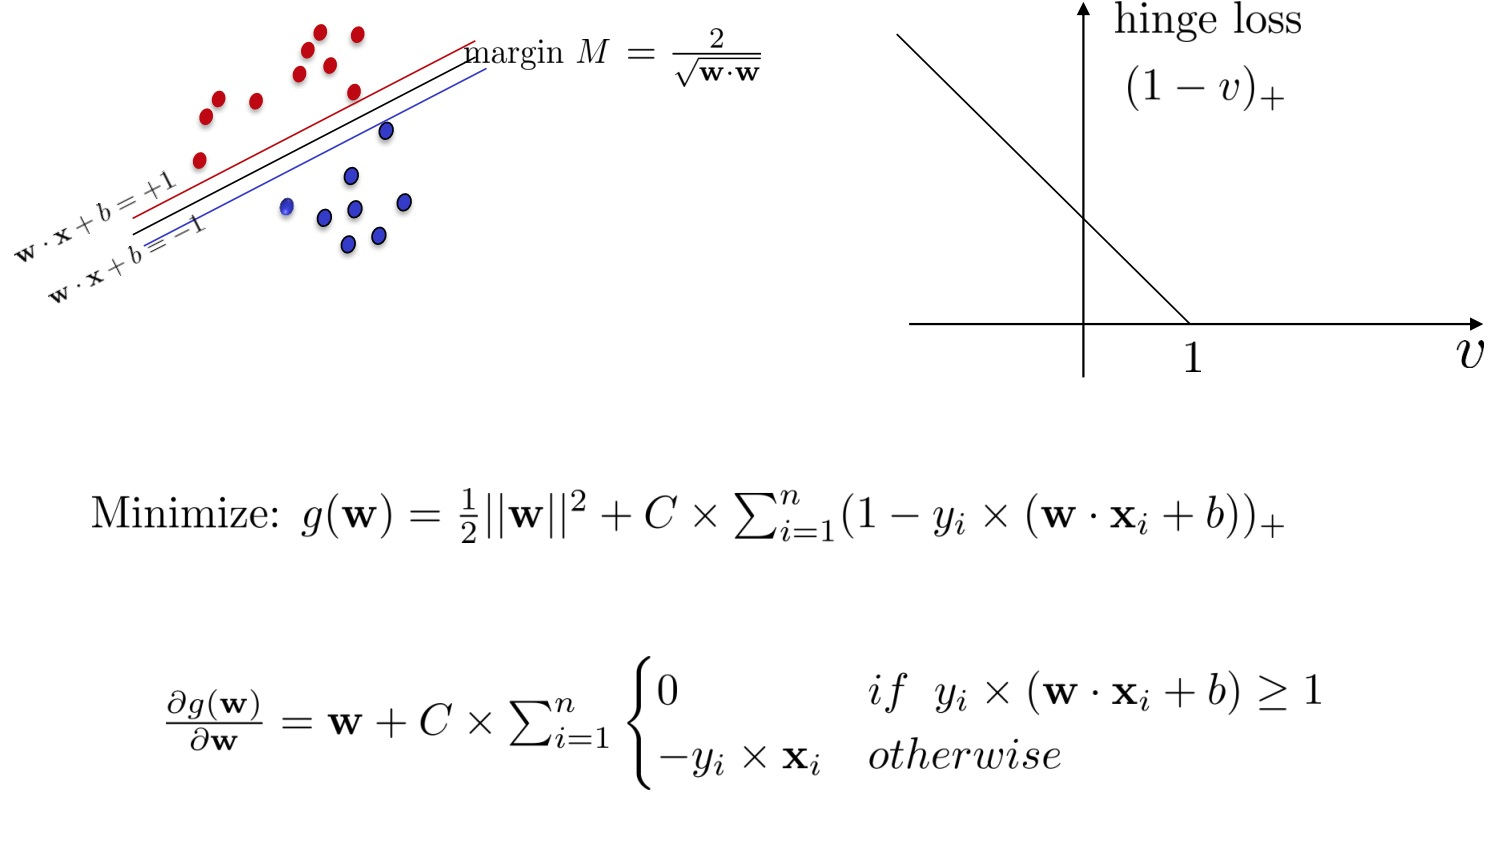

In [1]:
from IPython.display import Image

Image(filename='image/svm.jpg')

here we go on implementing the Support Vector Machine based on Hinge Loss function (primal form) from scratch 

In [2]:
import numpy as np
class SVM_classifier():
    # initiating the hyperparameters
    def __init__(self,learning_rate,epochs,lambda_parameter):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_parameter = lambda_parameter
        
    def fit(self,X,y,losspnt=False):
        
        # m  : number of data points 
        # n  : number of input features
        self.m , self.n = X.shape
        #initializing weights 
        self.w = np.random.rand(self.n)
        self.b = 0
        #recognizing inputs and class
        self.X = X
        self.y = y
        self.losses = []
        self.accuracies = []       
        
        #  Optimization using Sub gradient Descent algorithm
        for i in range(self.epochs):
            self.update_weights()
            loss = self.calculate_hinge_loss(self.X, self.y)
            self.losses.append(loss)
            self.accuracies.append(self.calculate_accuracy(self.X,self.y))
            if (losspnt):
                print(f"epoch {i+1}/{self.epochs} - Hinge Loss: {loss:.4f} \n , Accuracy: {self.calculate_accuracy(self.X,self.y):.2f}%")
            
    def update_weights(self):
        #label encoding {0:-1 , 1:+1}  
        y_label = np.where(self.y <= 0 , -1 ,1)
        
        # calculating gradients ( dw, db)
        for index , x_i in enumerate (self.X):
            condition = y_label[index] * (np.dot(x_i,self.w)+self.b) >= 1
            if condition :
                dw =  self.lambda_parameter * self.w
                db = 0
            else:
                dw = self.lambda_parameter * self.w - y_label[index] * x_i
                db = -y_label[index]
            # updating weights and bias
            self.w -= (self.learning_rate * dw)
            self.b -= (self.learning_rate * db)
     # calculating hinge loss to measure the performance of the SVM classifier   
    def calculate_hinge_loss(self, X, y):
        y_label = np.where(y <= 0, -1, 1)
        distances = 1 - y_label * (np.dot(X, self.w) + self.b)
        distances = np.maximum(0, distances)
        hinge_loss = np.mean(distances) + (self.lambda_parameter / 2) * np.dot(self.w, self.w)
        return hinge_loss 
    def calculate_accuracy(self,X,y):
        # calculating the accuracy of the model
        y_hat = self.predict(X)
        accuracy = np.mean(y_hat == y) * 100
        return accuracy
    def get_Weights(self):
        # returning the weights and bias
        return self.w , self.b
    def get_stats(self):
        # returning the losses for plotting the loss curve
        return self.losses ,self.accuracies
        
    
    # predict the label for a given input value
    def predict(self,X):
        output = np.dot(X,self.w) + self.b
        
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1 ,0 ,1)
        return y_hat